In [1]:
import pandas as pd
import numpy as np
# import pydot

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score

from sklearn.metrics import confusion_matrix

import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.api as smd
from statsmodels.stats.proportion import proportions_ztest

# 가설검정, 분산분석하는 패키지
from statsmodels.formula.api import ols # 분산분석하기? 모델링?
from statsmodels.stats.anova import anova_lm # 아노바 데이터프레임 형태 출력
from scipy.stats import shapiro
%matplotlib inline
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

# font_path = 'C:/Windows/Fonts/gulim.ttc'
font_path = 'C:/Windows/Fonts/gulim.ttc'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family = font_name)

from matplotlib import font_manager,rc

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.api import qqplot, add_constant

# from sklearn.tree import export_graphviz
# import graphviz

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
# import pydot

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score

from sklearn.metrics import confusion_matrix

import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.api as smd
from statsmodels.stats.proportion import proportions_ztest

# 가설검정, 분산분석하는 패키지
from statsmodels.formula.api import ols # 분산분석하기? 모델링?
from statsmodels.stats.anova import anova_lm # 아노바 데이터프레임 형태 출력
from scipy.stats import shapiro
%matplotlib inline
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

# # font_path = 'C:/Windows/Fonts/gulim.ttc'
# font_path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
# font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family = font_name)

from matplotlib import font_manager,rc

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.api import qqplot, add_constant

# from sklearn.tree import export_graphviz
# import graphviz

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [24]:
join_1 = pd.read_csv('result_1.csv',encoding='euckr')[['risk','index']]
join_2 = pd.read_csv('result_2.csv',encoding='euckr')[['n_risk','index']]
raw = pd.read_csv('raw_screen.csv',encoding='euckr')
raw_2 = pd.read_csv('screen_1.csv',encoding='euckr')

C:\Users\BHU\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1분류 기준

'bt_chol','bp_judge','bt_gluc_judge','bt_mchc_judge','gender'

In [25]:
raw = raw[['eyesight_left',
       'eyesight_right', 'hearing_left', 'hearing_right','index']]

In [26]:
raw

,eyesight_left,eyesight_right,hearing_left,hearing_right,index
0,1,1,1,1,11565
1,1,1,1,1,23186
2,1,1,1,1,127414
3,1,2,1,1,35119
4,2,2,1,1,50103
...,...,...,...,...,...
35464,1,1,1,1,22859
35465,2,1,1,1,51068
35466,0,0,1,1,171938
35467,2,2,1,1,121319


In [27]:
cl_1 = pd.merge(join_1,raw_2,on='index',how='left')
cl_1 = pd.merge(cl_1,raw,on='index',how='left')
cl_1.columns

Index(['risk', 'index', 'Unnamed: 0', 'bp_max', 'bp_min', 'bp_gluc', 'bt_mch',
       'bt_chol', 'gender', 'smoke_flag', 'drinking_flag', 'bp_judge',
       'bt_gluc_judge', 'bt_mchc_judge', 'eyesight_left', 'eyesight_right',
       'hearing_left', 'hearing_right'],
      dtype='object')

In [28]:
df = cl_1[['risk','eyesight_left',
       'eyesight_right', 'hearing_left', 'hearing_right','smoke_flag',
       'drinking_flag','bt_chol','bp_judge','bt_gluc_judge','bt_mchc_judge','gender']]

df

,risk,eyesight_left,eyesight_right,hearing_left,hearing_right,smoke_flag,drinking_flag,bt_chol,bp_judge,bt_gluc_judge,bt_mchc_judge,gender
0,1.0,1,1,1,1,1.0,0.0,197.0,0,0,0,1.0
1,1.0,1,1,1,1,1.0,0.0,229.0,0,0,0,1.0
2,1.0,1,1,1,1,1.0,0.0,196.0,1,0,0,1.0
3,1.0,1,2,1,1,3.0,1.0,180.0,1,0,0,1.0
4,1.0,1,1,1,1,2.0,0.0,212.0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35416,1.0,1,1,1,1,1.0,0.0,195.0,0,0,0,2.0
35417,1.0,1,1,1,1,1.0,0.0,224.0,0,1,0,2.0
35418,1.0,1,1,1,1,1.0,0.0,194.0,0,1,0,2.0
35419,1.0,2,1,1,1,1.0,0.0,241.0,0,0,0,2.0


## 탐색적 분석

In [23]:
def myhist(data,var):
    plt.hist(data[data['risk']==0][var],label = '수익', alpha = 0.5)
    plt.hist(data[data['risk']==1][var],label = '위험', alpha = 0.5)
    plt.legend()
    
def mycrosstab(data,var) : 
    print(pd.crosstab(index = data['risk'], columns = data[var]))
    print()
    print(pd.crosstab(index = data['risk'], columns = data[var],normalize = 'columns').round(3))

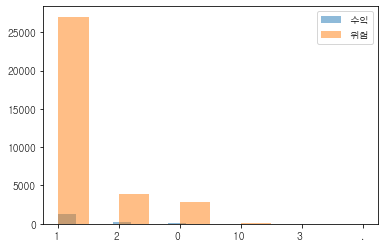

In [24]:
myhist(df,'eyesight_left')

In [25]:
mycrosstab(df,'eyesight_left')

eyesight_left  .    0      1   10     2   3 
risk                                        
0.0            0   115   1230   10   187   0
1.0            7  2833  27019   94  3924   2

eyesight_left    .     0      1     10      2    3 
risk                                               
0.0            0.0  0.039  0.044  0.096  0.045  0.0
1.0            1.0  0.961  0.956  0.904  0.955  1.0


In [17]:
d = pd.DataFrame({'A':[115,1230   ,187   ,  0   , 10],'B':[2832 , 27015 , 3924 ,    2  ,  94]})
chi, p, dof, expected = stats.chi2_contingency(d.T) #테이블 형태로 넣는다는 의미
print('검정 통계량은 {0} p-value는 {1})'.format(chi.round(3), p.round(6))) # 유의

검정 통계량은 8.821 p-value는 0.065729)


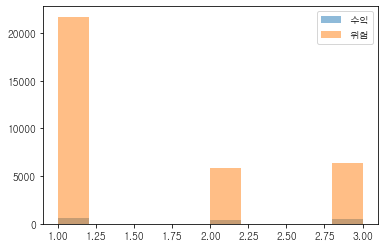

In [31]:
myhist(df,'smoke_flag')

In [30]:
mycrosstab(df,'smoke_flag')

smoke_flag    1.0   2.0   3.0
risk                         
0.0           650   424   468
1.0         21714  5829  6324

smoke_flag    1.0    2.0    3.0
risk                           
0.0         0.029  0.068  0.069
1.0         0.971  0.932  0.931


In [27]:
d = pd.DataFrame({'A':[650  , 424  , 468],'B':[ 21714 , 5829 , 6324]})
chi, p, dof, expected = stats.chi2_contingency(d.T) #테이블 형태로 넣는다는 의미
print('검정 통계량은 {0} p-value는 {1})'.format(chi.round(3), p.round(6))) # 유의

검정 통계량은 305.828 p-value는 0.0)


In [29]:
for i in df.columns :
    df = df[df[i] != '.']

df = df.astype('float')

C:\Users\BHU\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [52]:
heat = df.corr()

In [56]:
heat = heat.iloc[8:12,1:7]

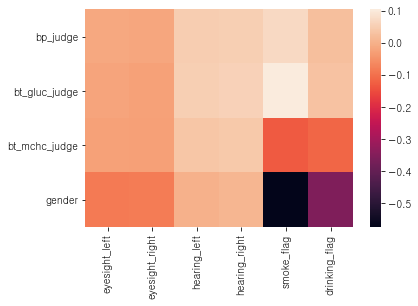

In [57]:
sns.heatmap(heat)

In [48]:
df.corr()

,risk,eyesight_left,eyesight_right,hearing_left,hearing_right,smoke_flag,drinking_flag,bt_chol,bp_judge,bt_gluc_judge,bt_mchc_judge,gender
risk,1.000000,-0.014783,-0.004466,-0.002378,-0.007021,-0.086496,-0.035441,-0.013154,0.081276,-0.226490,-0.030669,0.130119
eyesight_left,-0.014783,1.000000,0.324643,-0.029177,-0.033210,0.054786,0.059898,0.006141,-0.014322,-0.020070,-0.024717,-0.084458
eyesight_right,-0.004466,0.324643,1.000000,-0.047438,-0.044552,0.053013,0.062882,0.000152,-0.015364,-0.024033,-0.026826,-0.082707
hearing_left,-0.002378,-0.029177,-0.047438,1.000000,0.526667,-0.023974,-0.055948,-0.035760,0.048955,0.052027,0.037282,0.001002
hearing_right,-0.007021,-0.033210,-0.044552,0.526667,1.000000,-0.024898,-0.058088,-0.038341,0.051671,0.057050,0.040940,0.010908
smoke_flag,-0.086496,0.054786,0.053013,-0.023974,-0.024898,1.000000,0.330241,0.023629,0.071105,0.103734,-0.129480,-0.572779
drinking_flag,-0.035441,0.059898,0.062882,-0.055948,-0.058088,0.330241,1.000000,0.028529,0.026481,0.032370,-0.114332,-0.355209
bt_chol,-0.013154,0.006141,0.000152,-0.035760,-0.038341,0.023629,0.028529,1.000000,0.058790,0.028094,-0.101112,0.010711
bp_judge,0.081276,-0.014322,-0.015364,0.048955,0.051671,0.071105,0.026481,0.058790,1.000000,0.177467,-0.038387,-0.138699
bt_gluc_judge,-0.226490,-0.020070,-0.024033,0.052027,0.057050,0.103734,0.032370,0.028094,0.177467,1.000000,-0.038030,-0.160338


In [33]:
st = ''
for i in df.columns :
    st += i
    st += "+"
print(st)

risk+eyesight_left+eyesight_right+hearing_left+hearing_right+smoke_flag+drinking_flag+bt_chol+bp_judge+bt_gluc_judge+bt_mchc_judge+gender+


In [34]:
log_model = Logit.from_formula(''' risk ~ eyesight_left+eyesight_right+
hearing_left+hearing_right+smoke_flag+
drinking_flag+bt_chol+bp_judge+bt_gluc_judge+bt_mchc_judge+gender ''',data = df)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

Optimization terminated successfully.
         Current function value: 0.136970
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                35409
Model:                          Logit   Df Residuals:                    35397
Method:                           MLE   Df Model:                           11
Date:                Thu, 07 May 2020   Pseudo R-squ.:                  0.2351
Time:                        15:28:54   Log-Likelihood:                -4850.0
converged:                       True   LL-Null:                       -6340.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.1849      0.289     11.004      0.000       2.618       3.752
eyesight_left    

In [41]:
log_model = Logit.from_formula(''' risk ~ bp_judge+bt_gluc_judge+
bt_mchc_judge+gender''',data = df)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

Optimization terminated successfully.
         Current function value: 0.137376
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                35409
Model:                          Logit   Df Residuals:                    35404
Method:                           MLE   Df Model:                            4
Date:                Thu, 07 May 2020   Pseudo R-squ.:                  0.2328
Time:                        15:30:29   Log-Likelihood:                -4864.3
converged:                       True   LL-Null:                       -6340.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.5814      0.113     22.850      0.000       2.360       2.803
bp_judge          1.

In [42]:
ensem_x = df.drop(['risk'],axis=1)
ensem_y = df[['risk']]

# ensem_x = pd.get_dummies(ensem_x)

# scaler = StandardScaler()
# en_sc = scaler.fit_transform(ensem_x)
# ensem_x = pd.DataFrame(en_sc,columns=ensem_x.columns)

# 데이터 분할 1 : 학습용과 시험용

train_x, test_x, train_y, test_y = train_test_split(ensem_x,ensem_y,test_size=0.3,random_state = 1234)
# 학습용 데이터를 밸리데이션과 학습용으로 분할함으로써 CV진행 준비
train_x, val_x, train_y, val_y = train_test_split(train_x,train_y,test_size = 3/7, random_state = 1234)

In [43]:
gb_final = GradientBoostingClassifier(random_state=1234)
gb_final.fit(train_x,train_y)

print()
print('최종 모델의 train data의 설명력 : {:.3f}'.format(gb_final.score(train_x,train_y)))
print('최종 모델의 validation data의 설명력 : {:.3f}'.format(gb_final.score(val_x,val_y)))
print('최종 모델의 test data의 설명력 : {:.3f}'.format(gb_final.score(test_x,test_y)))

C:\Users\BHU\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



최종 모델의 train data의 설명력 : 0.993
최종 모델의 validation data의 설명력 : 0.991
최종 모델의 test data의 설명력 : 0.992


In [44]:
y_pred=gb_final.predict(test_x)
print('Accuracy:{0:.3f}\n'.format(gb_final.score(test_x,test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(test_y,y_pred)))

#분석 모델
model=['GradientBoosting']
#정확도 저장
train_accuracy=[]; test_accuracy=[]
#f1 score 저장
model_f1_score=[]
#auc score 저장
model_auc=[]
#precision score저장
model_precision_score=[]
#recall score 저장
model_recall_score=[]

#최종 모델
gb_model=GradientBoostingClassifier(random_state=1234)
gb_model.fit(train_x,train_y)
# train 정확도
train_accuracy.append(gb_model.score(train_x, train_y))
# test 정확도
test_accuracy.append(gb_model.score(test_x, test_y))
#최종 모델을 이용한 분류 예측
y_pred=gb_model.predict(test_x)
#roc_curve(실제값,예측값) fpr=(FP)/(FP+TN):거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성비율(재현율)
fpr,tpr,thresholds=roc_curve(test_y,y_pred)
roc_auc=auc(fpr,tpr)
#auc 저장
model_auc.append(roc_auc)

#f1스코어
model_f1_score.append(f1_score(test_y,y_pred))
#precision 스코어
model_precision_score.append(precision_score(test_y,y_pred))
#recall 스코어
model_recall_score.append(recall_score(test_y,y_pred))

df_eval=pd.DataFrame(index=model)
df_eval['TrainAccuracy']=train_accuracy
df_eval['TestAccuracy']=test_accuracy
df_eval['F1Score']=model_f1_score
df_eval['AUC']=model_auc
df_eval['PrecisionScore']=model_precision_score
df_eval['RecallScore']=model_recall_score
df_eval.round(3)

Accuracy:0.992

Confusion matrix:
[[  404    77]
 [   10 10132]]


C:\Users\BHU\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,TrainAccuracy,TestAccuracy,F1Score,AUC,PrecisionScore,RecallScore
GradientBoosting,0.993,0.992,0.996,0.919,0.992,0.999


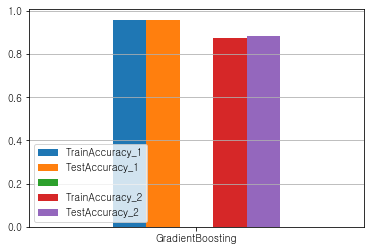

In [45]:
df_eval=pd.DataFrame(index=model)
df_eval['TrainAccuracy_1']=0.958
df_eval['TestAccuracy_1']=0.955
df_eval['  ']=0
df_eval['TrainAccuracy_2']=0.875
df_eval['TestAccuracy_2']=0.884

#정확도 bar plot 생성
df_eval.plot.bar(rot=0)
plt.legend(loc='lower left')
plt.grid(axis='y')
#인공신경망 모델이 가장 높은 정확도와 f1,auc를 보임
#neural_net>gradient boosting>decisiontree>randomforest

In [46]:
v_featrue_name = train_x.columns
df_Importance = pd.DataFrame()
df_Importance['Feature'] = v_featrue_name
df_Importance['Importance'] = gb_model.feature_importances_
df_Importance.sort_values('Importance',ascending = False, inplace = True)
df_Importance.round(3)

,Feature,Importance
6,bt_chol,0.662
8,bt_gluc_judge,0.128
10,gender,0.107
7,bp_judge,0.077
9,bt_mchc_judge,0.024
5,drinking_flag,0.003
0,eyesight_left,0.000
1,eyesight_right,0.000
2,hearing_left,0.000
3,hearing_right,0.000


Text(0, 0.5, '설명변수')

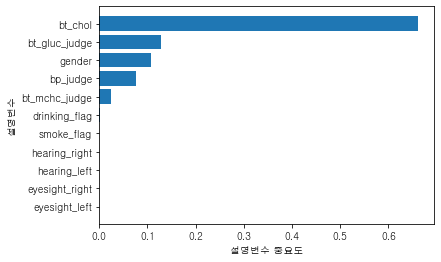

In [47]:
df_Importance.sort_values('Importance',ascending = True, inplace = True)
coordinates = range(len(df_Importance))
plt.barh(y=coordinates, width = df_Importance['Importance'])
plt.yticks(coordinates,df_Importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

## 정확도 0.955 GB 모델 결과, 흡연 유무가 중요하다고 나옴 

흡연을 1분류 가입 심사 항목에 추가함으로써 심사 정확도를 높이는 것이 좋다고 판단

# 2분류 기준

In [81]:
cl_2 = pd.merge(join_2,raw,on='index',how='left')
cl_2.columns

Index(['n_risk', 'index', 'Unnamed: 0', 'no', 'gender', 'age_group',
       'height_group', 'weight_group', 'waist', 'eyesight_left',
       'eyesight_right', 'hearing_left', 'hearing_right', 'bp_max', 'bp_min',
       'bp_gluc', 'bt_chol', 'bt_trig', 'bt_hdl', 'bt_ldl', 'bt_mch',
       'bt_crea', 'bt_ast', 'bt_alt', 'bt_rgpt', 'smoke_flag',
       'drinking_flag'],
      dtype='object')

In [82]:
df = cl_2[['n_risk','eyesight_left',
       'eyesight_right', 'hearing_left', 'hearing_right','smoke_flag',
       'drinking_flag']]

df

,n_risk,eyesight_left,eyesight_right,hearing_left,hearing_right,smoke_flag,drinking_flag
0,0.0,1,1,1,1,1,0
1,0.0,1,1,1,1,1,0
2,0.0,1,1,1,1,1,0
3,0.0,1,2,1,1,3,1
4,0.0,1,1,1,1,2,0
...,...,...,...,...,...,...,...
33874,0.0,1,1,1,1,1,0
33875,0.0,1,1,1,1,1,0
33876,0.0,1,1,1,1,1,0
33877,0.0,2,1,1,1,1,0


In [83]:
for i in df.columns :
    df = df[df[i] != '.']

df = df.astype('float')

C:\Users\BHU\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [85]:
log_model = Logit.from_formula(''' n_risk ~ eyesight_left+eyesight_right+hearing_left+
hearing_right+smoke_flag+drinking_flag ''',data = df)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

Optimization terminated successfully.
         Current function value: 0.363787
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 n_risk   No. Observations:                33867
Model:                          Logit   Df Residuals:                    33860
Method:                           MLE   Df Model:                            6
Date:                Tue, 05 May 2020   Pseudo R-squ.:                0.003903
Time:                        01:47:24   Log-Likelihood:                -12320.
converged:                       True   LL-Null:                       -12369.
Covariance Type:            nonrobust   LLR p-value:                 1.309e-18
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.7101      0.118    -22.920      0.000      -2.942      -2.478
eyesight_left    

In [87]:
df_x = df.drop(['n_risk'],axis = 1)
df_x # 종속 변수 빼고 새롭게 데이터 프레임 생성
df_x_const = add_constant(df_x) # const열 생성

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF',inplace=True)
df_vif.round(3) # 다중공선성 존재 X -> 회귀식 자체로 판단

,variable,VIF
1,eyesight_left,1.118
2,eyesight_right,1.120
5,smoke_flag,1.125
6,drinking_flag,1.130
3,hearing_left,1.382
4,hearing_right,1.383
0,const,59.851


In [92]:
log_model = Logit.from_formula(''' n_risk ~ eyesight_right+
hearing_right+smoke_flag+drinking_flag ''',data = df)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

Optimization terminated successfully.
         Current function value: 0.363843
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 n_risk   No. Observations:                33867
Model:                          Logit   Df Residuals:                    33862
Method:                           MLE   Df Model:                            4
Date:                Tue, 05 May 2020   Pseudo R-squ.:                0.003751
Time:                        01:48:18   Log-Likelihood:                -12322.
converged:                       True   LL-Null:                       -12369.
Covariance Type:            nonrobust   LLR p-value:                 3.347e-19
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.6971      0.104    -26.055      0.000      -2.900      -2.494
eyesight_right   

## 전체 변수

In [94]:
ensem_x = df.drop(['n_risk'],axis=1)
ensem_y = df[['n_risk']]

# ensem_x = pd.get_dummies(ensem_x)

# scaler = StandardScaler()
# en_sc = scaler.fit_transform(ensem_x)
# ensem_x = pd.DataFrame(en_sc,columns=ensem_x.columns)

# 데이터 분할 1 : 학습용과 시험용

train_x, test_x, train_y, test_y = train_test_split(ensem_x,ensem_y,test_size=0.3,random_state = 1234)
# 학습용 데이터를 밸리데이션과 학습용으로 분할함으로써 CV진행 준비
train_x, val_x, train_y, val_y = train_test_split(train_x,train_y,test_size = 3/7, random_state = 1234)

In [95]:
gb_final = GradientBoostingClassifier(random_state=1234)
gb_final.fit(train_x,train_y)

print()
print('최종 모델의 train data의 설명력 : {:.3f}'.format(gb_final.score(train_x,train_y)))
print('최종 모델의 validation data의 설명력 : {:.3f}'.format(gb_final.score(val_x,val_y)))
print('최종 모델의 test data의 설명력 : {:.3f}'.format(gb_final.score(test_x,test_y)))

C:\Users\BHU\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



최종 모델의 train data의 설명력 : 0.875
최종 모델의 validation data의 설명력 : 0.886
최종 모델의 test data의 설명력 : 0.884


In [96]:
y_pred=gb_final.predict(test_x)
print('Accuracy:{0:.3f}\n'.format(gb_final.score(test_x,test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(test_y,y_pred)))

#분석 모델
model=['GradientBoosting']
#정확도 저장
train_accuracy=[]; test_accuracy=[]
#f1 score 저장
model_f1_score=[]
#auc score 저장
model_auc=[]
#precision score저장
model_precision_score=[]
#recall score 저장
model_recall_score=[]

#최종 모델
gb_model=GradientBoostingClassifier(random_state=1234)
gb_model.fit(train_x,train_y)
# train 정확도
train_accuracy.append(gb_model.score(train_x, train_y))
# test 정확도
test_accuracy.append(gb_model.score(test_x, test_y))
#최종 모델을 이용한 분류 예측
y_pred=gb_model.predict(test_x)
#roc_curve(실제값,예측값) fpr=(FP)/(FP+TN):거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성비율(재현율)
fpr,tpr,thresholds=roc_curve(test_y,y_pred)
roc_auc=auc(fpr,tpr)
#auc 저장
model_auc.append(roc_auc)

#f1스코어
model_f1_score.append(f1_score(test_y,y_pred))
#precision 스코어
model_precision_score.append(precision_score(test_y,y_pred))
#recall 스코어
model_recall_score.append(recall_score(test_y,y_pred))

df_eval=pd.DataFrame(index=model)
df_eval['TrainAccuracy']=train_accuracy
df_eval['TestAccuracy']=test_accuracy
df_eval['F1Score']=model_f1_score
df_eval['AUC']=model_auc
df_eval['PrecisionScore']=model_precision_score
df_eval['RecallScore']=model_recall_score
df_eval.round(3)

Accuracy:0.884

Confusion matrix:
[[8981    0]
 [1180    0]]


C:\Users\BHU\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BHU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,TrainAccuracy,TestAccuracy,F1Score,AUC,PrecisionScore,RecallScore
GradientBoosting,0.875,0.884,0.0,0.5,0.0,0.0


# 선택 변수

In [98]:
ensem_x = df.drop(['n_risk','eyesight_left','hearing_left'],axis=1)
ensem_y = df[['n_risk']]

# ensem_x = pd.get_dummies(ensem_x)

# scaler = StandardScaler()
# en_sc = scaler.fit_transform(ensem_x)
# ensem_x = pd.DataFrame(en_sc,columns=ensem_x.columns)

# 데이터 분할 1 : 학습용과 시험용

train_x, test_x, train_y, test_y = train_test_split(ensem_x,ensem_y,test_size=0.3,random_state = 1234)
# 학습용 데이터를 밸리데이션과 학습용으로 분할함으로써 CV진행 준비
train_x, val_x, train_y, val_y = train_test_split(train_x,train_y,test_size = 3/7, random_state = 1234)

In [99]:
gb_final = Rand(random_state=1234)
gb_final.fit(train_x,train_y)

print()
print('최종 모델의 train data의 설명력 : {:.3f}'.format(gb_final.score(train_x,train_y)))
print('최종 모델의 validation data의 설명력 : {:.3f}'.format(gb_final.score(val_x,val_y)))
print('최종 모델의 test data의 설명력 : {:.3f}'.format(gb_final.score(test_x,test_y)))

C:\Users\BHU\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



최종 모델의 train data의 설명력 : 0.875
최종 모델의 validation data의 설명력 : 0.886
최종 모델의 test data의 설명력 : 0.884


In [100]:
y_pred=gb_final.predict(test_x)
print('Accuracy:{0:.3f}\n'.format(gb_final.score(test_x,test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(test_y,y_pred)))

#분석 모델
model=['GradientBoosting']
#정확도 저장
train_accuracy=[]; test_accuracy=[]
#f1 score 저장
model_f1_score=[]
#auc score 저장
model_auc=[]
#precision score저장
model_precision_score=[]
#recall score 저장
model_recall_score=[]

#최종 모델
gb_model=GradientBoostingClassifier(random_state=1234)
gb_model.fit(train_x,train_y)
# train 정확도
train_accuracy.append(gb_model.score(train_x, train_y))
# test 정확도
test_accuracy.append(gb_model.score(test_x, test_y))
#최종 모델을 이용한 분류 예측
y_pred=gb_model.predict(test_x)
#roc_curve(실제값,예측값) fpr=(FP)/(FP+TN):거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성비율(재현율)
fpr,tpr,thresholds=roc_curve(test_y,y_pred)
roc_auc=auc(fpr,tpr)
#auc 저장
model_auc.append(roc_auc)

#f1스코어
model_f1_score.append(f1_score(test_y,y_pred))
#precision 스코어
model_precision_score.append(precision_score(test_y,y_pred))
#recall 스코어
model_recall_score.append(recall_score(test_y,y_pred))

df_eval=pd.DataFrame(index=model)
df_eval['TrainAccuracy']=train_accuracy
df_eval['TestAccuracy']=test_accuracy
df_eval['F1Score']=model_f1_score
df_eval['AUC']=model_auc
df_eval['PrecisionScore']=model_precision_score
df_eval['RecallScore']=model_recall_score
df_eval.round(3)

Accuracy:0.884

Confusion matrix:
[[8981    0]
 [1180    0]]


C:\Users\BHU\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BHU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,TrainAccuracy,TestAccuracy,F1Score,AUC,PrecisionScore,RecallScore
GradientBoosting,0.875,0.884,0.0,0.5,0.0,0.0


### 정확도는 오르나 정밀도가 좋지 X -> 기존의 기준을 유지 판단